In [130]:
import time
import random
import statistics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [67]:
time_deltas = []

In [68]:
# Function-decorator for time complexity calculating
def pin_time(func):
    def wrapper(vector, *args, **kwargs):
        t_start = time.time()
        func(vector, *args, **kwargs)
        t_end = time.time()
        time_deltas.append(t_end-t_start)
    return wrapper

### Longest common subsequence

In [113]:
# Dynamic implementation of LCS
@pin_time
def lcs(X, Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y) 
  
    # declaring the array for storing the dp values 
    L = [[None]*(n + 1) for i in range(m + 1)] 
  
    """Following steps build L[m + 1][n + 1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m + 1): 
        for j in range(n + 1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n] 

In [143]:
# Function to estimate time complexity (length = m*n - production of strings lenghts)
def time_complexity(length, a):
    return a*length

In [163]:
# Draw the results
def draw_graphics(X, Y, m_s, n_s):
    plt.figure(figsize=(14, 7))
    
    
    length = []
    for m, n in zip(m_s, n_s):
        length.append(m * n)


    # use curve_fit() for approximation the results
    popt, pcov = curve_fit(time_complexity, length, Y)
    
    # find f(X) values for theoretical graph
    Y_theoretical = []
    
    for m, n in zip(m_s, n_s):
        length = m * n
        Y_theoretical.append(time_complexity(length, *popt))
        
    plt.plot(X, Y, label="Experimental results")
    plt.plot(X, Y_theoretical, label="Approximation")
    
    plt.ylabel('Average time, sec')
    plt.xlabel('Iterations')
    plt.legend()
    plt.show()

In [126]:
# Some examples
letters = 'ABCDEFGHIJKLMNOPQRDSTUVWXYZ'

def generate_sequence(length):
    sequence = ''
    for i in range(length):
        sequence += letters[random.randint(0,len(letters)-1)]
    return sequence

In [96]:
X = generate_sequence(10)
X

'MZELNAJLHD'

In [97]:
Y = generate_sequence(15)
Y

'EJTSGDGXZPGUAGQ'

In [104]:
lcs(X, Y)

3

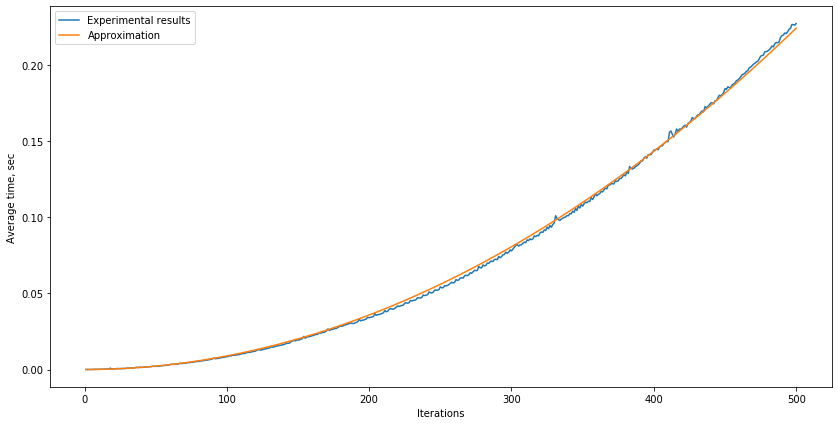

In [169]:
# Time complexity calculation
global time_deltas
all_times = {}

m_s = []
n_s = []


i = 0

for m, n in zip(range(1, 501), range(1,1001,2)):
    i += 1
    time_deltas = []
    X = generate_sequence(m)
    Y = generate_sequence(n)
    for _ in range(5):
        lcs(X, Y)
    all_times[i] = statistics.mean(time_deltas)
    m_s.append(m)
    n_s.append(n)
draw_graphics(list(all_times.keys()), list(all_times.values()), m_s, n_s)

### Grey Wolf Optimizer

In [3]:
# Import the libriraies
from NiaPy.task import StoppingTask, OptimizationType
from NiaPy.benchmarks import Benchmark
from NiaPy.algorithms.basic import GreyWolfOptimizer

In [43]:
# Implemetation of the first function for the benchmark
def first(D, sol):
    val = 0.0
    for i in range(D): val += sol[i] ** 2
    return val

In [44]:
# Implemetation of the second function for the benchmark
def second(D, sol):
    s = 0.0
    p = 1
    for i in range(D):
        s += abs(sol[i])
        p *= abs(sol[i])
    val = s + p
    return val

In [57]:
# Implemetation of the third function for the benchmark
def third(D, sol):
    s = 0.0
    val = 0.0
    for i in range(D):
        for j in range(i):
            s += sol[j]
        val += s ** 2
        s = 0.0
    return val

In [34]:
# Custom benchmark class for GWO
class MyBenchmark(Benchmark):
    def __init__(self, a, b, evaluate):
        Benchmark.__init__(self, a, b)
        self.evaluate = evaluate

    def function(self):
        return self.evaluate

In [118]:
@pin_time
def min_found(algo, task):
    # running algorithm returns best found minimum
    return algo.run(task)[-1]

In [125]:
# Theoretical estimate of GWO function (O(N × m × maxIter), where N × m × maxIter = x)
def theoretical_gwo(x, a):
    return a * x

In [133]:
# Function to draw graphics with experimental and approximated results
def draw_graphics(X, Y):
    
    parameters = [d*ngen*np for d, ngen, np  in zip(range(30, 130, 5), range(100, 1000, 5), range(15, 150, 5))]
    
    plt.figure(figsize=(14, 7))
    
    # use curve_fit() for approximation the results
    popt, pcov = curve_fit(theoretical_gwo, parameters, Y)
    
    # find f(X) values for theoretical graph
    Y_theoretical = []
    
    for parameter in parameters:
        Y_theoretical.append(theoretical_gwo(parameter, *popt))
    
    
    plt.plot(X, Y, label="Experimental results")
    plt.plot(X, Y_theoretical, label="Approximation")

    plt.ylabel('Average time, sec')
    plt.xlabel('Iterations')
    plt.legend()
    plt.show()

In [134]:
# Main function with time calculation
def main(D, nGEN, a, b, NP, evaluate):
    
    global time_deltas
    all_times = {}   
    time_deltas = []
    
    mins = []
    i = 0
    for d, ngen, np  in zip(range(30, 130, 5), range(100, 1000, 5), range(15, 150, 5)):
        time_deltas = []
        i += 1
        for _ in range(5):      
            task = StoppingTask(D=d,
                                nGEN=ngen,
                                optType=OptimizationType.MINIMIZATION,
                                benchmark=MyBenchmark(a, b, evaluate))

            # parameter is population size
            algo = GreyWolfOptimizer(NP=np)

            # printing best minimum
            minimum = min_found(algo, task)
        all_times[i] = statistics.mean(time_deltas)
    
    draw_graphics(list(all_times.keys()), list(all_times.values()))

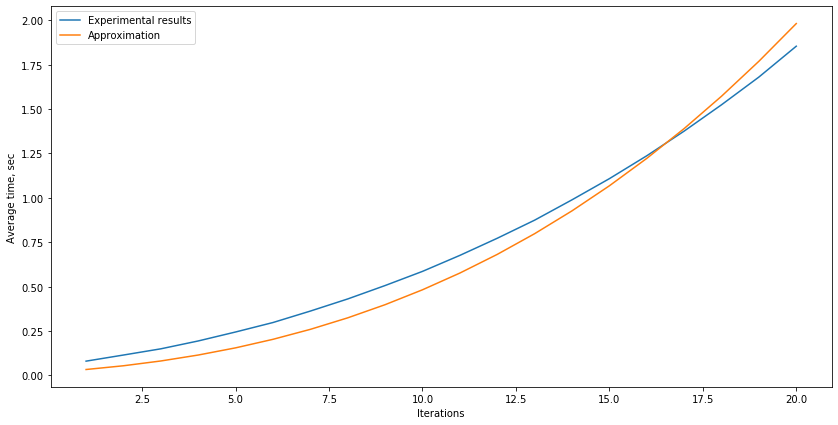

In [135]:
main(30, 100, -100, 100, 20, first)

In [103]:
# Main function without time calculation
def main(D, nGEN, a, b, NP, evaluate):
    
    global time_deltas
    all_times = {}   
    time_deltas = []
    
    mins = []
    
    for i in range(10):
        task = StoppingTask(D=D,
                            nGEN=nGEN,
                            optType=OptimizationType.MINIMIZATION,
                            benchmark=MyBenchmark(a, b, evaluate))

        # parameter is population size
        algo = GreyWolfOptimizer(NP=NP)
        
        # printing best minimum
        minimum = min_found(algo, task)
        print(minimum)
        
        mins.append(minimum)
        
    print("Average minimum is " + str(statistics.mean(mins)))

In [109]:
# This and below are results for some samples
main(30, 100, -100, 100, 20, first)

0.00037149148416855524
0.002601686935380859
0.0005698572148643297
0.0011683344529877454
0.0008265323747882278
2.774601508018444e-05
0.001780685196302945
0.0002633528591909265
0.001292974804351669
0.00034038475035481496
Average minimum is 0.0009243046087470257


In [112]:
main(30, 1000, -100, 100, 20, first)

1.0059193278520146e-75
1.2873900556391105e-77
6.804718320299058e-76
1.7065392300872276e-79
3.3761083260536896e-75
1.6615234248825683e-73
1.6028082422989554e-78
3.3051933128630266e-77
1.17427042098064e-78
6.870142696209946e-76
Average minimum is 1.7195072981008475e-74


In [108]:
main(30, 10000, -100, 100, 20, first)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Average minimum is 0.0


In [104]:
main(30, 100, -10, 10, 20, second)

0.0024481389571124708
0.003742339467286094
0.003483344729825457
0.001431480170200152
0.004140066084238405
0.0042128593600245234
0.0018336831504956956
0.005079220142749623
0.0035176712273984464
0.011152982085987032
Average minimum is 0.00410417853753179


In [111]:
main(30, 1000, -10, 10, 20, second)

5.816797525867107e-46
1.8814926268637402e-44
1.8620015701242718e-44
2.7179819491547797e-45
2.174920214971656e-46
6.385582661457392e-46
4.1574763196273977e-44
1.1024856958096263e-44
2.827423261557443e-45
4.695741873223474e-46
Average minimum is 9.748727156251454e-45


In [113]:
main(30, 10000, -10, 10, 20, second)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
Average minimum is 0.0


In [106]:
main(30, 100, -100, 100, 20, third)

5947.322417808107
387.36515356613603
284.09577308169236
381.2480433305146
1020.6224822595574
284.80781016169954
4304.208297220295
2092.6989331493596
1625.3790348755651
731.2804028845256
Average minimum is 1705.9028348337454


In [107]:
main(30, 1000, -100, 100, 20, third)

2.7016715156955748e-16
1.605952159071594e-17
1.3515554304907827e-21
4.688223973188994e-19
5.555633033794211e-20
4.938042583694307e-19
1.7150562787311956e-14
7.913748961393742e-18
2.0806841048306724e-21
6.588370821013231e-21
Average minimum is 1.7445731413030005e-15


In [110]:
main(30, 10000, -100, 100, 20, third)

1.4997743997111082e-231
2.9144622606840798e-239
1.8787412762344928e-237
7.499395287275213e-226
1.1774735783347936e-244
2.7081612083550426e-243
2.488243427557912e-237
1.1889315932022835e-225
1.4039314124492268e-223
8.59436019892872e-231
Average minimum is 1.4233202246099147e-224
